In [1]:
from virusPropagationModel import *
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt
import pandas

In [2]:
geopath = 'datafiles/'
geofiles = {1:'Buildings_Bad_Feilnbach_MA_1.csv',
            2:'Buildings_Bad_Feilnbach_MA_3.csv'}

In [3]:
modeledWorld1 = ModeledPopulatedWorld(1000,100, world_from_file=True, geofile_name=geopath+geofiles[2], agent_agent_infection=True, input_schedules='schedules_v1')
print('Number of agents: '+ str(modeledWorld1.number_of_people))
print('Distribution of initialized locations: ' + str(modeledWorld1.get_distribution_of_location_types()))

Number of agents: 1512
Distribution of initialized locations: {'hospital': 1, 'morgue': 1, 'work': 24, 'public': 18, 'school': 3, 'home': 713}


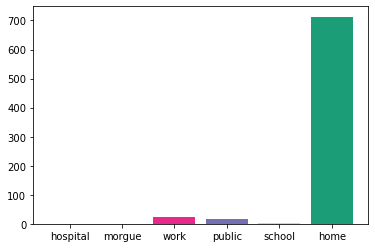

In [4]:
modeledWorld1.plot_distribution_of_location_types()

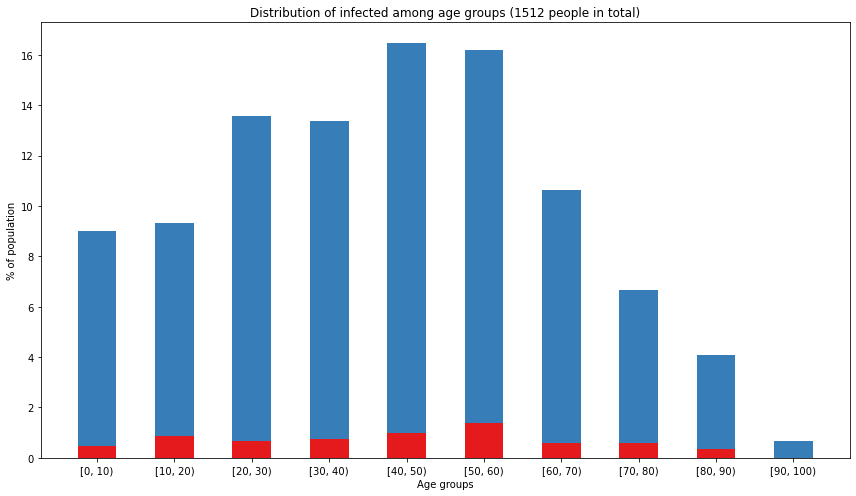

In [5]:
 modeledWorld1.plot_initial_distribution_of_ages_and_infected(age_groups_step=10)

In [6]:
simulation1 = Simulation(modeledWorld1,1500,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})

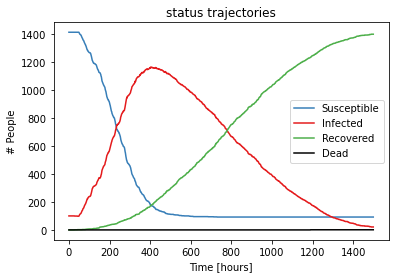

In [7]:
simulation1.simulate()
simulation1.plot_status_timecourse()

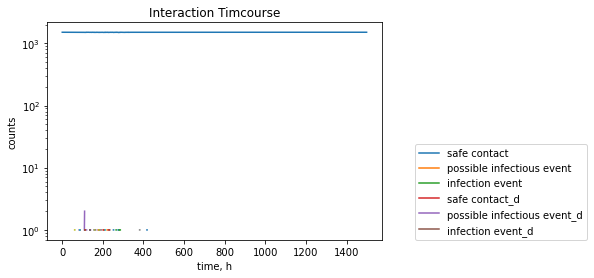

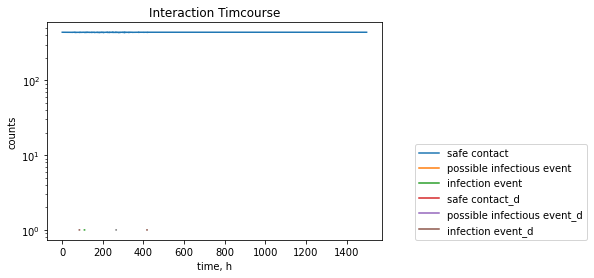

In [8]:
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=False)
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=True)

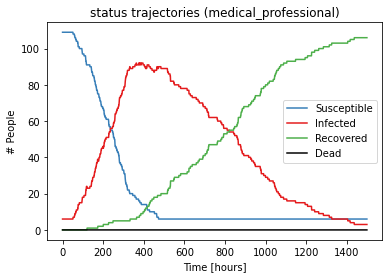

In [11]:
simulation1.plot_status_timecourse(specific_people='medical_professional')

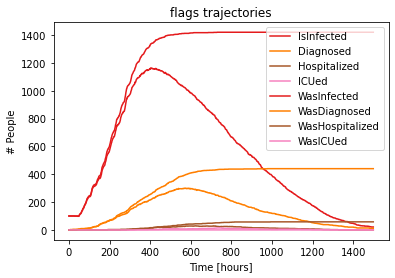

In [12]:
simulation1.plot_flags_timecourse()

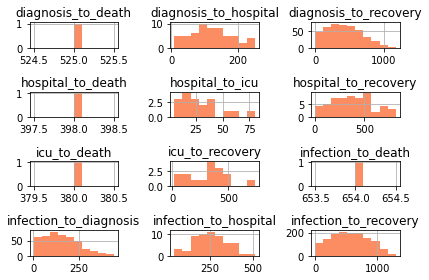

In [13]:
simulation1.plot_distributions_of_durations()

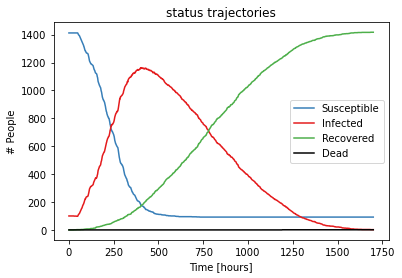

In [14]:
simulation2 = Simulation(simulation1,200) # Now Simulation class objects can be used for subsequent simulation (nested)
simulation2.plot_status_timecourse()

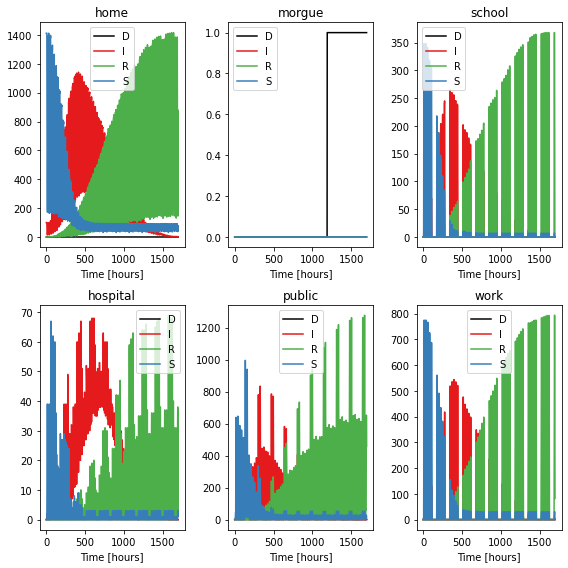

In [15]:
simulation2.plot_status_at_location()

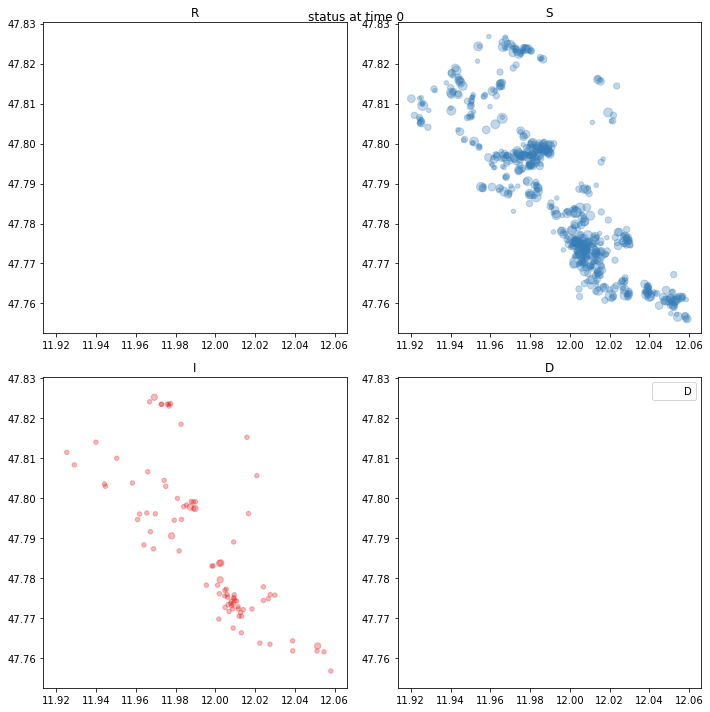

In [16]:
simulation1.map_status_at_loc(save_figure=False,time_steps=1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


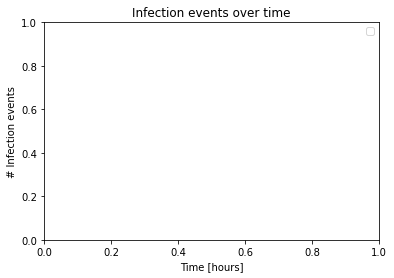

In [17]:
simulation1.plot_infections_per_location_type_over_time()

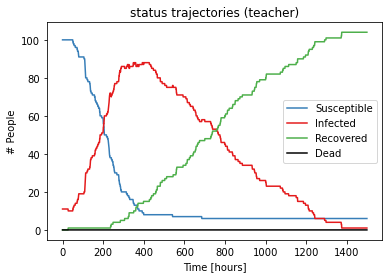

In [18]:
simulation1.plot_status_timecourse(specific_people='teacher')

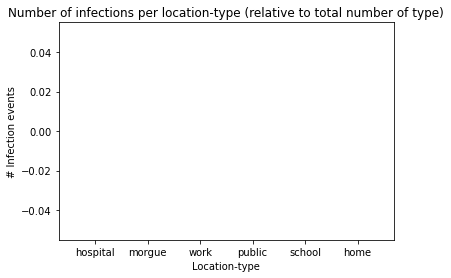

In [19]:
simulation1.plot_infections_per_location_type()

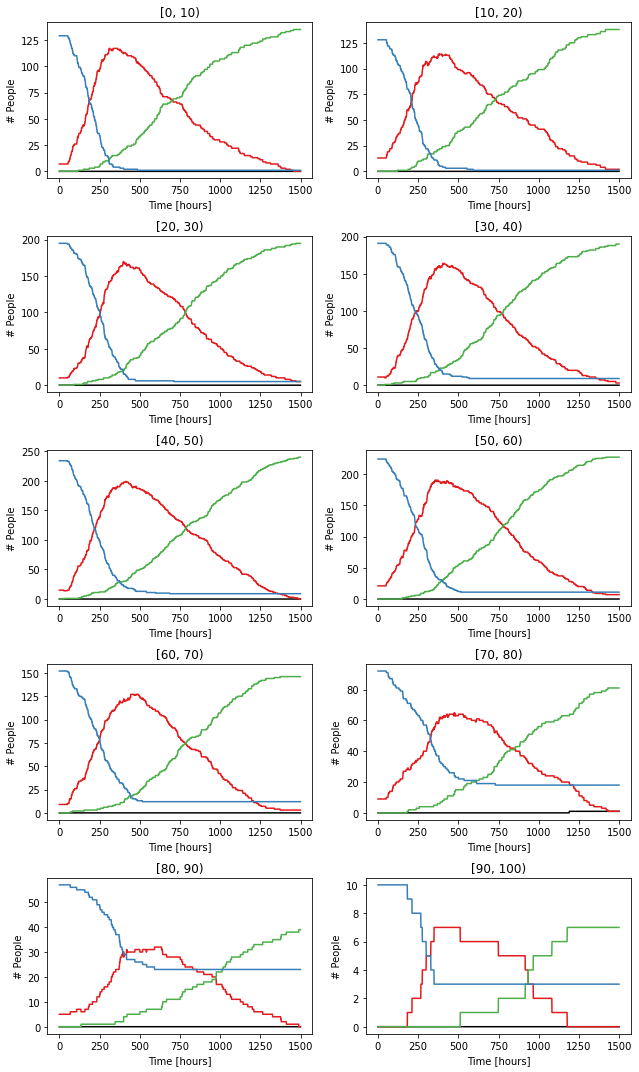

In [20]:
simulation1.plot_age_groups_status_timecourse()